## Principal Component Analysis

It is a statistical technique used to analyze and reduce the dimensionality of a dataset while retaining the most important information.

### Approach 
- Calculate Covariance
- Calculate Eigenvectors and Eigenvalues of Cov Matrix
- Sort Eigenvectors according to their Eigenvalues in decreasing order
- For K dimension choose first K EigenVectors
- Transform the data points into k dimension (Dot Prodcut)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### From Scratch

In [2]:
def Principal_Component_Analysis(x,dim=1):
    
    # Step 1 - Calculate Cov
    x = x - np.mean(x,axis=0)
    matrix = np.cov(x.T)
    
    # Step 2 - Calculate Eigenvectors and Eigenvalues of Cov Matrix
    eig_val, eig_vec = np.linalg.eig(matrix)
    
    # Step 3 - Sort Eigenvectors according to their Eigenvalues in decreasing order
    sorted_index = np.argsort(eig_val)[::-1]
    eig_val = eig_val[sorted_index]
    eig_vec = eig_vec[:,sorted_index]
    
    # Step 4 - Choose first K EigenVectors
    k_matrix = eig_vec[:,0:dim]
    
    # Step 5 - Transform the data points into k dimension
    ans = np.dot(x,k_matrix)
    
    return eig_val,ans

## Mnist Dataset

In [3]:
df = pd.read_csv("mnist_test.csv")

In [4]:
print("Shape : ", df.shape)
df.head()

Shape :  (10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [6]:
eig_val, reduced = Principal_Component_Analysis(x,10)
eig_val = eig_val.astype('float64')
reduced = reduced.astype('float64')
print(reduced[:5])

[[-411.26099613  686.56161016  -51.11294617 -242.56873406 -483.54367894
  -380.05921937 -425.77003862  585.96695672 -220.25402004  273.41054287]
 [  58.06593519 -983.17025995    8.88468962  397.28032645 -171.26071378
   447.78692234 -127.7353866   198.26972344  210.89809656  142.08143135]
 [-935.10533853 -459.07466105  319.99450898  262.53050241 -469.90123433
  -126.97062334   32.41550656 -153.7788158    84.45082363  153.35101594]
 [1255.66650618  106.99254128  121.96698162 -246.64975402 -318.41370753
   405.65451549 -627.20873497  128.32482696   23.14989657  114.45599641]
 [ 132.88704929  744.54184514  -61.20153075  703.88328497 -129.23608624
  -279.90664796  509.40766387  281.38958428 -226.34381675  -52.43257516]]


In [7]:
for i,j in enumerate(np.cumsum(eig_val/np.sum(eig_val))):
    print(i+1,j*100,"%")
    if(i == 9):
        break

1 10.04766332920709 %
2 17.592149944678674 %
3 23.732666135224477 %
4 29.158473527949898 %
5 34.18972242872774 %
6 38.436085793482455 %
7 41.74748956181832 %
8 44.697777910174494 %
9 47.42763564595668 %
10 49.70567704917954 %


### Sklearn Implementation

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
print(pca.fit_transform(x)[:5])

[[-411.26103429 -686.56148394  -51.11268231 -242.56392513 -483.54892226
  -380.06964997  425.77590686 -585.84904816 -220.31646059  272.94098012]
 [  58.06593152  983.17032141    8.88472405  397.27286352 -171.25507457
   447.79726359  127.55574224 -198.45612409  210.56527528  144.48491861]
 [-935.10534711  459.07479492  319.99481863  262.53038053 -469.90147935
  -126.97395601  -32.37504524  153.74674529   84.35042851  153.22041663]
 [1255.66652166 -106.99210363  121.96769499 -246.65420327 -318.41181001
   405.65164369  627.34387706 -128.52863013   22.83446957  114.41820633]
 [ 132.88709027 -744.54167498  -61.20141722  703.87925065 -129.23013904
  -279.90094771 -509.45418198 -281.38419092 -226.42080224  -52.07925395]]


In [9]:
for i,j in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    print(i+1,j*100,"%")

1 10.047663329207083 %
2 17.592149944677075 %
3 23.73266613521787 %
4 29.15847352751357 %
5 34.189722427961975 %
6 38.43608579085087 %
7 41.747489127271834 %
8 44.69777695890848 %
9 47.42763410210406 %
10 49.705652341147584 %


### Scree Plot

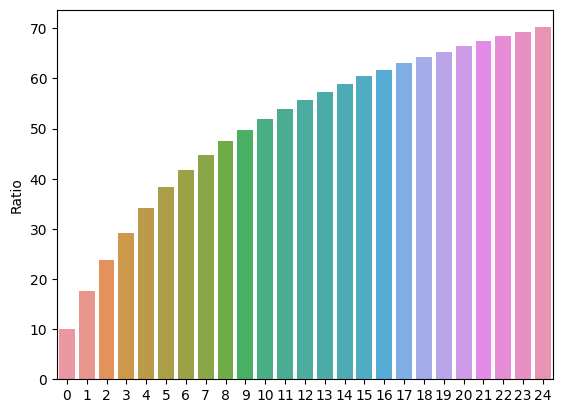

In [10]:
import seaborn as sns

value = pd.DataFrame((np.cumsum(eig_val/np.sum(eig_val))*100)[:25],columns = ["Ratio"])
sns.barplot(value, x=value.index, y="Ratio")
plt.show()